In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [118]:
class Point:
    def __init__(self,cordinates,name):
        self.x = cordinates[0]
        self.y = cordinates[1]
        self.name = name

    def __repr__(self):
        return (f"({self.x}, {self.y})" )

    def __str__(self):
        return (self.name)

    

    @classmethod
    def generate_random_points(cls,n):
        random_points = []
        for i in range(n):
            x = np.round(np.random.uniform(0, 100),4)
            y = np.round(np.random.uniform(0, 100),4)
            random_points.append(cls((x,y),f'P{i}'))
        return random_points

In [42]:
def magnitud(P0):
        numbers = [P0[0], P1[1]]
        sqrt_sum_power = np.sqrt(sum(np.power(numbers, 2)))
        return sqrt_sum_power
    
def cross_product(p0,p1,p2):# tomamos p0 como el punto de origen, p1 como el punto que queremos categorizar, respecto a p2

    prod1 = (p1.x - p0.x) * (p2.y - p0.y)
    prod2 = (p1.y - p0.y) * (p2.x - p0.x)
    res = prod1 - prod2
    if res < 0 : return 1   #print("p1 esta en sentido horario respecto a p2 - p0")
    elif res > 0 :return -1 #print ("p1 esta en sentido anti-horario respecto a p2 - p0")
    else: return 0          #print(" los segmentos son colineales")

def check_last3_points(points): # detecta si se agregó algún punto que generó un giro antihorario
    pn = points[-1]
    pn_1 = points[-2]
    pn_2 = points[-3]
    cross = cross_product(pn_2,pn_1,pn)
    if cross == 1 or cross == 0:
        #print ("giro a la derecha (horario)")
        return 1
    else:
        #print ("giro a la izquierda (antihorario)")
        return 0

In [43]:
def sort_lexico(points):# se usa la funcion lambda y el sort de python para ordenar los puntos
    sorted_lst = sorted(points, key=lambda point: (point.x, point.y))
    return sorted_lst


Vamos a comenzar con los pasos del algoritmo:
1) ordenar los puntos segun su coordenada x

o en este caso usando orden lexico gráfico



> Bloque con sangría




2) oRDENAR LSO n-1 PUNTOS según la pendiente que corresponde al segmento formado p0 con [p1,p2,p3,......]
varios puntos con la misma pendiente selecciono únicamente el que esta más lejos de p0
**TENGO LA DUDA SI CUANDO DICE ÚNICAMENTE EL QUE ESTÁ MÁS LEJOS DE P0 DEBO DESECHARLO COMO PUNTO A TOMAR EN CUENTA O SIMPLEMENTE CAMBIARLO DE LUGAR HARÉ LO PRIMERO POR SIMPLICIDAD**

In [44]:
def ordenar_pendientes(points):
    points = sorted(points, key=lambda point: point[1]) # ordenamos por pendiente
    cont = 0
    while cont + 1 < len(points):
     # ya que estan oredenados verificamos si las pendientes son iguales
        if points[cont][1] == points[cont+1][1]:

      # en caso que si, verificamos cual tiene mayor magnitud
            if (magnitud(points[cont][0])) >= (magnitud(points[cont+1][0])): points.remove(points[cont +1])
            else :points.remove(points[cont])

            cont -= 1 # restamos para asegurarnos de que no hayan dos pendientes consecutivas iguales
        cont += 1
    return points


def pendientes(points, P0):
    pendientes = []
    N = len(points)
    new_array = []
    for i in range((N)):
        if (points[i].x == P0.x): M = -np.inf
        else: M = ((points[i].y - P0.y) / (points[i].x - P0.x))
        pendientes.append(M)
    
    points_M = list(zip(points, pendientes))

    result = ordenar_pendientes(points_M)
    return result

In [111]:
#paso1
points = Point.generate_random_points(100)
points = sort_lexico(points)
P0 = points.pop(0)


#paso2
points_M = pendientes(points, P0)# revisar que pasa la segunda vez que se corre
points, slodes = zip(*points_M)
points = list(points)
points.insert(0, P0)



In [112]:
#paso3 a 10
def visualization(points, convex):
    # Plotting the original points and their coordinates
    x = [coor.x for coor in points]
    y = [coor.y for coor in points]

    # Create a figure and axes
    fig, axs = plt.subplots(figsize=(12, 6))

    # Plot the original points and their x-coordinate labels in the left subplot
    axs.scatter(x, y, color='blue')

    # Add x-coordinate labels
    for point in points:
        x_label = point.name
        axs.text(point.x, point.y, x_label, ha='center', va='bottom')

    # Plot the lines connecting the points
    for i in range(len(convex) - 1):
        axs.plot([convex[i].x, convex[i+1].x], [convex[i].y, convex[i+1].y], color='red')

    axs.set_title('Convex Hull')

    # Show the plot
    plt.tight_layout()
    plt.show()

def convex_hull(points):
    stack_s = []
    points.append(points[0])
    N = len(points)
    stack_s.append(points[0])
    stack_s.append(points[1])
    stack_s.append(points[2])
    for i in range(3,N):
        #visualization(points, stack_s)
        while len(stack_s) >=3 and (check_last3_points(stack_s)):
            element = stack_s[-2]
            stack_s.remove(element)
            
        
        stack_s.append(points[i])
        #visualization(points, stack_s)


        

    return stack_s



In [113]:
CH = convex_hull(points)


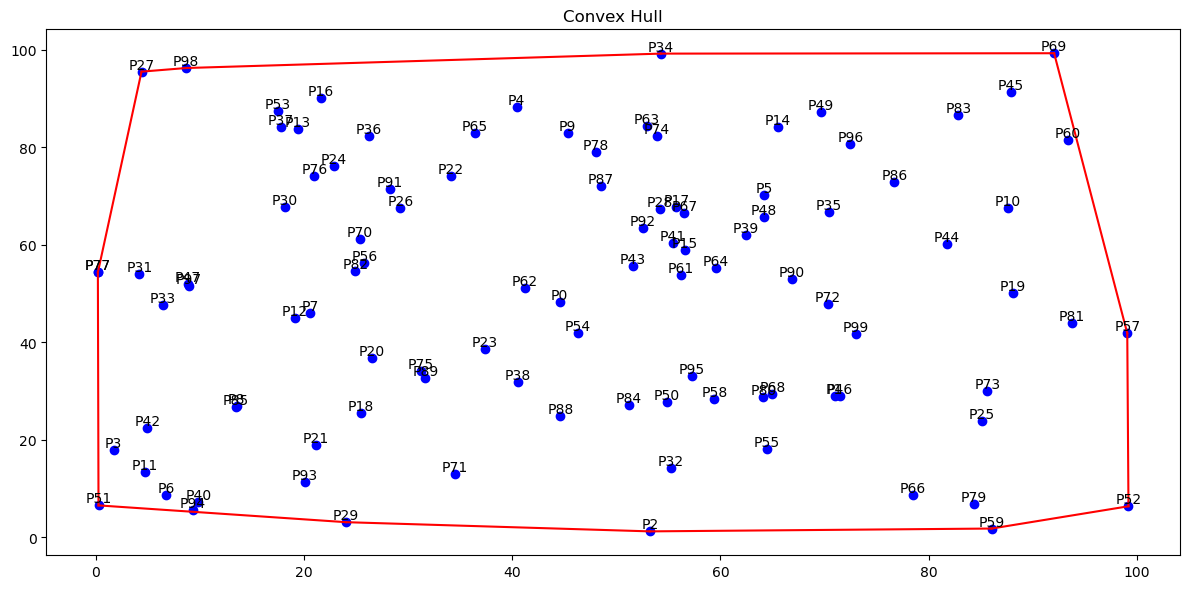

In [114]:
visualization(points, CH)

In [116]:
def print_list_convex_hull(CH):
    lis = []
    for p in CH:
        lis.append(p.name)
    print(lis)
    

In [117]:
print_list_convex_hull(CH)

['P77',
 'P51',
 'P29',
 'P2',
 'P59',
 'P52',
 'P57',
 'P69',
 'P34',
 'P98',
 'P27',
 'P77']